### CAR PRICE PREDICTION WITH MACHINE LEARNING

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Load dataset
data = pd.read_csv("car data.csv")
print("First 5 rows:")
print(data.head())

First 5 rows:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [4]:
print("\nInfo:")
print(data.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [5]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [6]:
print("\nSome statistics:")
print(data.describe())


Some statistics:
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


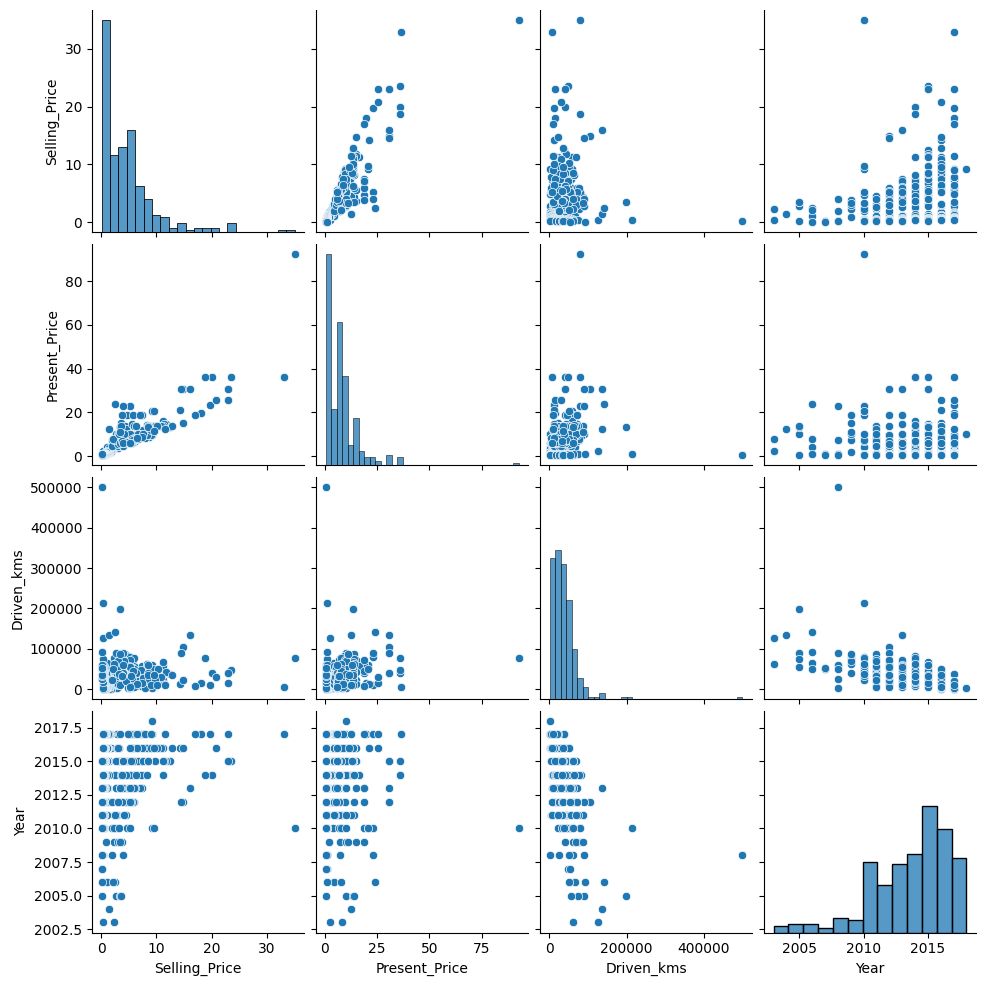

In [8]:
# Pairplot
sns.pairplot(data[["Selling_Price","Present_Price","Driven_kms","Year"]])
plt.show()

In [9]:
# Feature selection
y = data["Selling_Price"]
X = data.drop(["Selling_Price", "Car_Name"], axis=1)

# Identify numerical and categorical columns
num_cols = ["Year", "Present_Price", "Driven_kms", "Owner"]
cat_cols = ["Fuel_Type", "Selling_type", "Transmission"]

In [10]:
# Preprocessing and model in a Pipeline
numeric_transformer = "passthrough"

categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

model = LinearRegression()

pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [11]:
# Train‑test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# Train the model
pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [13]:
# Evaluation
y_pred = pipe.predict(X_test)

print("\nR2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.8488707839193608
MSE: 3.4813498305107737
RMSE: 1.8658375680939576


In [14]:
# Predicting for a new car
sample = pd.DataFrame({
    "Year": [2017],
    "Present_Price": [10.0],
    "Driven_kms": [15000],
    "Fuel_Type": ["Petrol"],
    "Selling_type": ["Dealer"],
    "Transmission": ["Manual"],
    "Owner": [0]
})

predicted_price = pipe.predict(sample)
print("\nPredicted Selling Price for sample car:", predicted_price[0])


Predicted Selling Price for sample car: 6.9605891621154115
